<a href="https://colab.research.google.com/github/mjtaheri11/hw2/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive" -a

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 C4droid.apk	    .ipynb_checkpoints	 test_image2.jpg   test_image4.png
'Colab Notebooks'   test_image1.jpg	 test_image3.jpg   test_image5.jpg


In [0]:
!pip3 install torch torchvision


example 2


In [0]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline


igame = imread('drive/My Drive/test_image1.jpg', 0)
resized_img = resize(igame, (128,64))
fd, hog_igame = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

np.save('hogfile', fd, hog_igame)

example 3


In [0]:
#@title Default title text
from __future__ import print_function
from itertools import chain
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
from skimage import data, color, transform, feature
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as modelselection
import sys, os


faces = fetch_lfw_people()
positive_patches = faces.images

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]


def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int)) 
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches
images = [color.rgb2grey(getattr(data, name)()) for name in imgs_to_use]

negative_patches = np.vstack([extract_patches(im, 1500, scale)
                               for im in images for scale in [0.5, 1.0, 2.0]])



example 4


In [0]:
from itertools import chain
X = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y = np.zeros(X.shape[0])
y[:positive_patches.shape[0]] = 1

In [0]:
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{'C': 1.0}

example 5

In [0]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
model.score(X_test, y_test)

0.9951918949085602

example 6


In [0]:
%matplotlib inline
from google.colab import files
from IPython.display import Image
from matplotlib.pyplot import imshow
from skimage import io
from skimage.transform import pyramid_gaussian

In [0]:
img1 = cv2.imread('drive/My Drive/test_image1.jpg', 0)
img2 = cv2.imread('drive/My Drive/test_image2.jpg', 0)
img3 = cv2.imread('drive/My Drive/test_image3.jpg', 0)
img4 = cv2.imread('drive/My Drive/test_image4.png', 0)
img5 = cv2.imread('drive/My Drive/test_image5.jpg', 0)
imges = [img1, img2, img3, img4, img5]
print(img1.shape, img2.shape, img3.shape, img4.shape, img5.shape)

(775, 620) (1500, 1000) (640, 960) (247, 300) (600, 600)


In [149]:
%matplotlib inline
import cv2
from skimage import io; io.use_plugin('matplotlib')
from skimage import data
from skimage.transform import pyramid_gaussian
import pandas as pd

def pyramid(image):
  x = []
  for (i, resized) in enumerate(pyramid_gaussian(image, downscale=1.8)):
    if resized.shape[0] < 100 or resized.shape[1] < 100:
      break
    else:
      yield resized
      

def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch

x = []
a = []
for i in pyramid(img4):
  x.append(i)
  try:
    indices, patches = zip(*sliding_window(i))
    patches_hog = np.array([feature.hog(patch) for patch in patches])
    patches_hog.shape 

    labels = model.predict(patches_hog)
    score = model._predict_proba_lr(patches_hog)
#    a.append(score)
  except ValueError:
    break



print(labels.shape)
#print(a[0].shape, a[1].shape, a[2].shape, a[3].shape)

(2014,)


In [150]:
labels = model.predict(patches_hog)
#print(score[labels == 1])
z = []
for i in score[labels == 1]:
  z.append(i[0])
z = np.array(z)
print(type(z))


<class 'numpy.ndarray'>


85


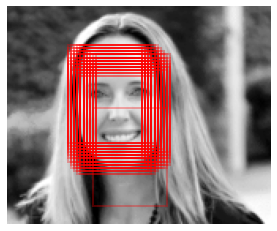

In [151]:
fig, ax = plt.subplots()
ax.imshow(x[-1], cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

print(len(indices[labels == 1]))

<class 'numpy.int32'>
[51]
[[36. 36. 38. 38.]]


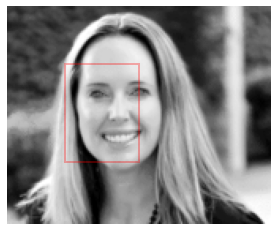

In [152]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.compat.v1 as tf
import tensorflow as tf


#tf.debugging.set_log_device_placement(True)

#boxes = np.array([[0.1,0.1,0.2,0.2], [0.3,0.3,0.3,0.4], [0.5,0.5,0.6,0.6], [0.7,0.7,0.8,0.8]], dtype= np.float32)
#scores = np.array([0.9,0.8,0.7,0.6], dtype = np.float32)



iou_threshold = 0.5
max_output_size = 1
# score = score[labels == 1]
# score = np.array(score)
# print(score)
# print(score[0])
# print(v, b)

boxes = np.zeros([len(indices[labels==1]), 4])

boxes[:, 0] = indices[labels == 1][:, 0]
boxes[:, 1] = indices[labels == 1][:, 0]
boxes[:, 2] = indices[labels == 1][:, 1]
boxes[:, 3] = indices[labels == 1][:, 1]


score = model._predict_proba_lr(patches_hog)
# with tf.device('/GPU:0'):
#   print(tf.image.non_max_suppression(boxes, scores, 8))
selected_indices = tf.image.non_max_suppression(
  boxes, z, max_output_size, iou_threshold)

nms = np.array(selected_indices)

print(type(nms[0]))
# sess = tf.Session()
# with sess.as_default():
#   nms = selected_indices.eval()
print(nms)
t = []
print(boxes[nms])
  

fig, ax = plt.subplots()
ax.imshow(x[-1], cmap='gray')
ax.axis('off')
#for i, j in indices[labels == 1]:
Ni, Nj = positive_patches[0].shape
ax.add_patch(plt.Rectangle((boxes[nms][0][0] ,boxes[nms][0][1]), Nj, Ni, edgecolor='red',
                           alpha=0.3, lw=2, facecolor='none'))

